# Autoencoder

In [ ]:
import numpy as np
import urllib.request
from gensim.utils import simple_preprocess
import os, re

# Download GloVe embeddings
# glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
# urllib.request.urlretrieve(glove_url, "glove.6B.zip")

# import zipfile
# with zipfile.ZipFile("glove.6B.zip", "r") as zip_ref:
#     zip_ref.extractall("glove.6B")

In [ ]:
# Example custom dataset
# custom_sentences = [
#     'african_buffalo', 'alligator', 'amphibian', 'amur_leopard', 
#     'ants', 'bear', 'bird', 'blue_whale', 'bobcat', 'cat', 'chimp', 
#     'chimpanzee', 'cow', 'dog', 'dolphin', 'domestic_water_buffalo', 
#     'eagle', 'elephant', 'fish', 'frog', 'giant', 'giant_panda', 'goat', 
#     'gorilla', 'hen', 'horse', 'killer_whale', 'lion', 'lizard', 'monkey', 
#     'mouse', 'orangutan', 'ostrich', 'ox', 'panda', 'polar_bear', 'rabbit', 
#     'rat', 'rhino', 'rhinoceros', 'rhinoceroses', 'seal', 'sealskin', 
#     'siamese_cat', 'skunk', 'spider_monkey', 'squirrel', 'tiger', 'turtle', 
#     'walrus', 'whale', 'bird', 'fish', 'lion', 'tiger', 'bull'
# ]
animals_list_file_path = os.path.join('..', 'Dataset', 'artefact1', 'animals.txt')
with open(animals_list_file_path, "r") as f:
    custom_sentences = [line[:-1] for line in f]

# Load GloVe embeddings
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings("glove.6B/glove.6B.300d.txt")  # Using 50d GloVe embeddings
print(f"embeddings_index : {type(embeddings_index)} \n")

# Convert sentences to embeddings
def sentence_to_embedding(sentence, embeddings_index):
    words = simple_preprocess(sentence)
    valid_words = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_words:
        return np.mean(valid_words, axis=0)
    else:
        return np.zeros(300) # Using 50d GloVe embeddings

sentence_embeddings = np.array([sentence_to_embedding(sentence, embeddings_index) for sentence in custom_sentences])
print(f"sentence_embeddings : {type(sentence_embeddings)} \n")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the size of the input and latent space
input_dim = 300 # 50  # Dimension of GloVe embeddings
latent_dim = 16  # Dimension of latent space

# Input layer
input_layer = Input(shape=(input_dim,))

# Sample Test 1
# Encoder layers
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(latent_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 2
# # Encoder layers
# encoded = Dense(latent_dim * 4, activation='relu')(input_layer)
# encoded = Dropout(0.2)(encoded)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dropout(0.2)(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dropout(0.2)(decoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dropout(0.2)(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 3
# # Encoder layers
# encoded = Dense(latent_dim * 4, activation='relu')(input_layer)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Sample Test 4
# # Encoder layers
# encoded = Dense(latent_dim * 16, activation='relu')(input_layer)
# encoded = Dense(latent_dim * 8, activation='relu')(encoded)
# encoded = Dense(latent_dim * 4, activation='relu')(encoded)
# encoded = Dense(latent_dim * 2, activation='relu')(encoded)
# encoded = Dense(latent_dim, activation='relu')(encoded)

# # Decoder layers
# decoded = Dense(latent_dim * 2, activation='relu')(encoded)
# decoded = Dense(latent_dim * 4, activation='relu')(decoded)
# decoded = Dense(latent_dim * 8, activation='relu')(decoded)
# decoded = Dense(latent_dim * 16, activation='relu')(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [ ]:
encoder.summary() 

In [ ]:
autoencoder.summary() 

In [ ]:
# Train the autoencoder
autoencoder.fit(sentence_embeddings, sentence_embeddings, epochs=500, batch_size=32, shuffle=True, validation_split=0.1)

In [ ]:
import matplotlib.pyplot as plt

image_name = 'test_1_result.png'
image_folder_path = os.path.join('..', 'Dataset', 'artefact2', 'result_images')
image_path = os.path.join(image_folder_path, image_name)

# summarize history for loss
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig(image_path, bbox_inches='tight')
plt.show()

In [ ]:
# Encode sentences to get their latent representations
sentence_latents = encoder.predict(sentence_embeddings)
# print(f"sentence_latents : {sentence_latents}")

# Create a dictionary to map sentences to their latent representations
sentence_to_latent = {i: sentence_latents[i] for i in range(len(custom_sentences))}
# print(f"sentence_to_latent : {sentence_to_latent}")

In [ ]:
custom_sentences.index('cat')

In [ ]:
print(custom_sentences, '\n')
print(sentence_to_latent[12], custom_sentences[12])

In [ ]:
from scipy.spatial.distance import cosine

def find_similar_sentences(target_sentence_index, sentence_to_latent, top_n=10):
    target_latent = sentence_to_latent[target_sentence_index]
    similarities = []
    for index, latent in sentence_to_latent.items():
        if index != target_sentence_index:
            similarity = 1 - cosine(target_latent, latent)
            similarities.append((index, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_n]

# Find sentences similar to the first sentence
similar_sentences = find_similar_sentences(12, sentence_to_latent, top_n=10)
print("Most similar sentences to the first sentence:")
for index, score in similar_sentences:
    print(f"Sentence: {custom_sentences[index]} - Similarity: {score}")


### Save model

In [ ]:
model_folder_path = os.path.join('..', 'Dataset', 'artefact2', 'model')

encoder.save(os.path.join(model_folder_path, 'encoder_model.h5'))
autoencoder.save(os.path.join(model_folder_path, 'autoencoder_model.h5'))

# For Image Classification

# Vanilla Autoencoder

A **Vanilla Autoencoder** is the most basic form of an autoencoder, which is a type of artificial neural network used for unsupervised learning. Its primary purpose is to learn efficient representations (encoding) of input data, typically for dimensionality reduction or feature learning. Here's a breakdown of its components and functionality:

### Components of a Vanilla Autoencoder:

1. **Encoder**:
   - The encoder is the first part of the autoencoder network.
   - It takes the input data (e.g., an image, text, or any other form of data) and compresses it into a lower-dimensional representation called the **latent space** or **latent vector**.
   - This is done through a series of layers, usually fully connected (dense) layers, where each layer reduces the dimensionality of the input data.

2. **Latent Space**:
   - The latent space is the compressed representation of the input data.
   - It captures the essential features of the input in a more compact form.
   - The dimensionality of the latent space is usually much smaller than that of the input data.

3. **Decoder**:
   - The decoder is the second part of the autoencoder network.
   - It takes the compressed latent space representation and attempts to reconstruct the original input data.
   - This is done through a series of layers that gradually increase the dimensionality back to the original input size.

4. **Reconstruction**:
   - The output of the decoder is the reconstructed version of the input data.
   - The autoencoder is trained to minimize the difference between the original input and the reconstructed output, often using a loss function like mean squared error (MSE).

### Objective of a Vanilla Autoencoder:
The main objective is to learn a representation of the data that allows the network to reconstruct the input as accurately as possible. The model is trained to minimize the reconstruction error, which is the difference between the input and the reconstructed output.

### Example Use Cases:
- **Dimensionality Reduction**: Autoencoders can reduce the dimensionality of data, similar to Principal Component Analysis (PCA), but in a non-linear fashion.
- **Denoising**: A variant called a Denoising Autoencoder can be used to remove noise from data.
- **Anomaly Detection**: Since autoencoders learn to represent "normal" data, they can be used to detect anomalies by identifying inputs with high reconstruction errors.

### Summary:
A Vanilla Autoencoder is a straightforward neural network architecture used to learn a compressed representation of data. It consists of an encoder that compresses the input and a decoder that reconstructs the input from the compressed representation. Despite its simplicity, the Vanilla Autoencoder is a powerful tool in unsupervised learning and feature extraction.

In [1]:
import os
import glob
from PIL import Image
from skimage.feature import greycomatrix, greycoprops

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from skimage import img_as_ubyte

from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

import matplotlib.pyplot as plt

In [4]:
# Function to build the Vanilla Autoencoder
def build_vanilla_autoencoder(input_shape, encoding_dim):
    input_img = Input(shape=input_shape)
    x = Flatten()(input_img)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
#     x = Dense(np.prod(input_shape), activation='softmax')(encoded)
    decoded = Reshape(input_shape)(x)
    
    autoencoder = Model(inputs=input_img, outputs=decoded)
    encoder = Model(inputs=input_img, outputs=encoded)
    
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder, encoder

# Function to extract GLCM features from an image
def extract_glcm_features(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True):
    
    # glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)
    # contrast = graycoprops(glcm, 'contrast').flatten()
    # dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    # homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    # energy = graycoprops(glcm, 'energy').flatten()
    # correlation = graycoprops(glcm, 'correlation').flatten()
    # asm = graycoprops(glcm, 'ASM').flatten()
    # features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation, asm])
    # return features

    # Define your GLCM properties (distances and angles)
    distances = [1, 3, 5, 3, 1, 3, 5]
    angles = [0, 0, 0, np.pi/4, np.pi/2, np.pi/2, np.pi/2]
    
    glcm_features = []
    for distance, angle in zip(distances, angles):
        # Compute GLCM properties
        glcm = greycomatrix(image, distances=[distance], angles=[angle], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]       
        
        glcm_features.extend([contrast, dissimilarity, homogeneity, energy, correlation])
        
    return np.array(glcm_features) # np.array([contrast, dissimilarity, homogeneity, energy, correlation])

# Main function to process images, extract features and save to CSV
def process_images_and_save_features(image_dir, encoding_dim=128, image_size=(64, 64), color_mode='grayscale'):
    datagen = ImageDataGenerator(rescale=1./255)
    
    generator = datagen.flow_from_directory(
        image_dir,
        target_size=image_size,
        color_mode=color_mode,
        class_mode='categorical', # 'binary',
        batch_size=1,
        shuffle=False
    )
    
    class_indices = generator.class_indices
    
    input_shape = (image_size[0], image_size[1], 1 if color_mode == 'grayscale' else 3)
    autoencoder, encoder = build_vanilla_autoencoder(input_shape, encoding_dim)
    
    autoencoder.fit(generator, epochs=1, steps_per_epoch=len(generator), verbose=1)
    
    # Save model
    model_folder_path = os.path.join('..', 'Dataset', 'artefact1', 'model1')
    os.makedirs(model_folder_path, exist_ok=True) 
    encoder.save(os.path.join(model_folder_path, 'encoder_model.h5'))
    autoencoder.save(os.path.join(model_folder_path, 'autoencoder_model.h5'))
    
    features = []
    labels = []
    
    for i in range(len(generator)):
        img, label = generator[i]
        img_gray = img_as_ubyte(img[0].squeeze())  # Convert to uint8 for GLCM
        
        feature_vector = encoder.predict(img)
        glcm_features = extract_glcm_features(img_gray)
        # print(f"feature_vector : {feature_vector} | {len(feature_vector)} | {len(feature_vector.flatten())}")
        # print(f"glcm_features : {glcm_features} | {len(glcm_features)}")
        
        combined_features = np.hstack([feature_vector.flatten(), glcm_features])
        features.append(combined_features)
        # labels.append(label[0])
        labels.append(np.argmax(label))  # Convert one-hot label to class index
    
    features_df = pd.DataFrame(features)
    labels_df = pd.Series(labels, name='label')
    result_df = pd.concat([features_df, labels_df], axis=1)
    
    result_df.to_csv(os.path.join('..', 'Dataset', 'artefact1', 'csv', 'encoder_process_images_and_save_features.csv'), 
                     index=False)
    print(f"Features saved to result.csv")

# Example usage:
image_dir = os.path.join('..', 'Dataset', 'artefact1', 'train')  # Replace with your actual image directory
process_images_and_save_features(image_dir, encoding_dim=128, image_size=(224, 224))
# process_images_and_save_features(image_dir, encoding_dim=2048, image_size=(224, 224))


Found 720 images belonging to 18 classes.
720/720 [==============================] - 136s 188ms/step - loss: 0.0564


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 35ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 31ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 31ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 32ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remove

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 18ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - ETA: 0s

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - ETA: 0s

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 41ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 32ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 32ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 43ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 42ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 34ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 36ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 34ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 34ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 31ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 35ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 34ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 32ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 31ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 16ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 30ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 28ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 29ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 19ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 27ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 23ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 33ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 20ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 22ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 24ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 21ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 25ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

1/1 [==============================] - 0s 26ms/step


C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be remo

Features saved to result.csv


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 163)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               20992     
                                                                 
 dense_7 (Dense)             (None, 18)                2322      
                                                                 
Total params: 23314 (91.07 KB)
Trainable params: 23314 (91.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 298.1881 - accuracy: 0.0853 - val_loss: 183.5823 - val_accuracy: 0.0741
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 156.0095 - accuracy: 0.0873 - val_loss: 113.8098 - val_accuracy: 0.0787
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 105.7571 - accuracy: 0.0734 - val_loss: 82.8845 - val_accuracy: 0.0787
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 72.7508 - accuracy: 0.0675 - val_loss: 61.3315 - val_accuracy: 0.1065
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 55.4556 - accuracy: 0.0833 - val_loss: 46.2010 - val_accuracy: 0.0972
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 42.1951 - accuracy: 0.1032 - val_loss: 35.9929 - val_accuracy: 0.0741
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 34.4058 - accuracy: 0.0853 - val_loss: 31.5161 - val_accuracy: 0.0972

8/8 [==============================] - 0s 8ms/step - loss: 8.6264 - accuracy: 0.2222 - val_loss: 9.7940 - val_accuracy: 0.1435
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.4032 - accuracy: 0.2103 - val_loss: 8.8425 - val_accuracy: 0.1574
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6466 - accuracy: 0.1984 - val_loss: 9.3734 - val_accuracy: 0.1528
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.4472 - accuracy: 0.2262 - val_loss: 8.5053 - val_accuracy: 0.1667
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.8746 - accuracy: 0.2421 - val_loss: 7.5825 - val_accuracy: 0.1111
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.3460 - accuracy: 0.2540 - val_loss: 9.0597 - val_accuracy: 0.1204
Epoch 64/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.6401 - accuracy: 0.2202 - val_loss: 9.1832 - val_accuracy: 0.1574
Epoch 65/1000
8/8 [========

Epoch 116/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.5967 - accuracy: 0.2837 - val_loss: 8.0841 - val_accuracy: 0.1991
Epoch 117/1000
8/8 [==============================] - 0s 10ms/step - loss: 5.3403 - accuracy: 0.2718 - val_loss: 7.1641 - val_accuracy: 0.1759
Epoch 118/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.8128 - accuracy: 0.2460 - val_loss: 8.1860 - val_accuracy: 0.1435
Epoch 119/1000
8/8 [==============================] - 0s 11ms/step - loss: 5.7720 - accuracy: 0.2480 - val_loss: 7.9772 - val_accuracy: 0.1389
Epoch 120/1000
8/8 [==============================] - 0s 15ms/step - loss: 5.3062 - accuracy: 0.2956 - val_loss: 8.6480 - val_accuracy: 0.1713
Epoch 121/1000
8/8 [==============================] - 0s 12ms/step - loss: 5.4954 - accuracy: 0.2937 - val_loss: 7.6246 - val_accuracy: 0.1991
Epoch 122/1000
8/8 [==============================] - 0s 11ms/step - loss: 5.5981 - accuracy: 0.2738 - val_loss: 6.8723 - val_accuracy: 0.1759
E

8/8 [==============================] - 0s 10ms/step - loss: 4.3769 - accuracy: 0.3234 - val_loss: 6.8914 - val_accuracy: 0.2083
Epoch 174/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9824 - accuracy: 0.3552 - val_loss: 7.5298 - val_accuracy: 0.1389
Epoch 175/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.1529 - accuracy: 0.3591 - val_loss: 6.1429 - val_accuracy: 0.1991
Epoch 176/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4279 - accuracy: 0.3294 - val_loss: 6.2979 - val_accuracy: 0.1620
Epoch 177/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6352 - accuracy: 0.3730 - val_loss: 5.8926 - val_accuracy: 0.1991
Epoch 178/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6835 - accuracy: 0.3294 - val_loss: 6.8711 - val_accuracy: 0.1852
Epoch 179/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.1895 - accuracy: 0.3294 - val_loss: 8.1131 - val_accuracy: 0.1759
Epoch 180/1000
8/8 [

Epoch 231/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5330 - accuracy: 0.3591 - val_loss: 5.7788 - val_accuracy: 0.2083
Epoch 232/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5042 - accuracy: 0.3710 - val_loss: 7.0754 - val_accuracy: 0.2083
Epoch 233/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8082 - accuracy: 0.3452 - val_loss: 6.2768 - val_accuracy: 0.1343
Epoch 234/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9109 - accuracy: 0.3452 - val_loss: 6.4164 - val_accuracy: 0.1944
Epoch 235/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.7068 - accuracy: 0.3829 - val_loss: 6.7842 - val_accuracy: 0.2037
Epoch 236/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5908 - accuracy: 0.3313 - val_loss: 7.0485 - val_accuracy: 0.1852
Epoch 237/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8852 - accuracy: 0.3472 - val_loss: 6.7552 - val_accuracy: 0.2454
Epoch 

Epoch 289/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.0281 - accuracy: 0.3889 - val_loss: 7.1938 - val_accuracy: 0.2083
Epoch 290/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.4713 - accuracy: 0.3433 - val_loss: 7.6522 - val_accuracy: 0.1296
Epoch 291/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6317 - accuracy: 0.3294 - val_loss: 7.3636 - val_accuracy: 0.1759
Epoch 292/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9508 - accuracy: 0.3929 - val_loss: 7.7642 - val_accuracy: 0.2083
Epoch 293/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.2258 - accuracy: 0.3353 - val_loss: 7.4350 - val_accuracy: 0.1620
Epoch 294/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.1307 - accuracy: 0.2996 - val_loss: 8.2869 - val_accuracy: 0.1620
Epoch 295/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.3639 - accuracy: 0.3750 - val_loss: 7.1671 - val_accuracy: 0.1481
Epoch 

8/8 [==============================] - 0s 8ms/step - loss: 3.2723 - accuracy: 0.3790 - val_loss: 6.6200 - val_accuracy: 0.2315
Epoch 347/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1780 - accuracy: 0.4147 - val_loss: 5.8818 - val_accuracy: 0.1944
Epoch 348/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5641 - accuracy: 0.3710 - val_loss: 5.7113 - val_accuracy: 0.2269
Epoch 349/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.1613 - accuracy: 0.4226 - val_loss: 6.0147 - val_accuracy: 0.2407
Epoch 350/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.0545 - accuracy: 0.4266 - val_loss: 5.8447 - val_accuracy: 0.2037
Epoch 351/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6569 - accuracy: 0.3730 - val_loss: 7.2188 - val_accuracy: 0.1667
Epoch 352/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4584 - accuracy: 0.3631 - val_loss: 6.6259 - val_accuracy: 0.1389
Epoch 353/1000
8/8 [=

Epoch 404/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3586 - accuracy: 0.3770 - val_loss: 6.9545 - val_accuracy: 0.2500
Epoch 405/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.2622 - accuracy: 0.3929 - val_loss: 7.6045 - val_accuracy: 0.1944
Epoch 406/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.7365 - accuracy: 0.3730 - val_loss: 6.1253 - val_accuracy: 0.2176
Epoch 407/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9346 - accuracy: 0.3671 - val_loss: 7.5336 - val_accuracy: 0.1944
Epoch 408/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.5955 - accuracy: 0.3750 - val_loss: 7.2435 - val_accuracy: 0.1852
Epoch 409/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.0105 - accuracy: 0.3690 - val_loss: 7.0678 - val_accuracy: 0.2500
Epoch 410/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7346 - accuracy: 0.3730 - val_loss: 6.8041 - val_accuracy: 0.2176
Epoch 

Epoch 462/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5245 - accuracy: 0.3889 - val_loss: 7.9083 - val_accuracy: 0.1806
Epoch 463/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5029 - accuracy: 0.3948 - val_loss: 6.5526 - val_accuracy: 0.2269
Epoch 464/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2835 - accuracy: 0.4087 - val_loss: 6.7564 - val_accuracy: 0.1806
Epoch 465/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3036 - accuracy: 0.4087 - val_loss: 6.7626 - val_accuracy: 0.2315
Epoch 466/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.1456 - accuracy: 0.4048 - val_loss: 6.3716 - val_accuracy: 0.1713
Epoch 467/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3016 - accuracy: 0.4127 - val_loss: 7.6104 - val_accuracy: 0.1898
Epoch 468/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9428 - accuracy: 0.4127 - val_loss: 7.5094 - val_accuracy: 0.1343
Epoch 

Epoch 520/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.7280 - accuracy: 0.4385 - val_loss: 6.1488 - val_accuracy: 0.2500
Epoch 521/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.8184 - accuracy: 0.4563 - val_loss: 6.5350 - val_accuracy: 0.2130
Epoch 522/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.8303 - accuracy: 0.4563 - val_loss: 6.5301 - val_accuracy: 0.2269
Epoch 523/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.6833 - accuracy: 0.4663 - val_loss: 7.0612 - val_accuracy: 0.2361
Epoch 524/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0386 - accuracy: 0.4405 - val_loss: 7.7118 - val_accuracy: 0.1898
Epoch 525/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4662 - accuracy: 0.3988 - val_loss: 6.6169 - val_accuracy: 0.2037
Epoch 526/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4275 - accuracy: 0.4444 - val_loss: 7.0875 - val_accuracy: 0.2222
Epoch 

8/8 [==============================] - 0s 8ms/step - loss: 3.0572 - accuracy: 0.4702 - val_loss: 7.4472 - val_accuracy: 0.2361
Epoch 578/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.5800 - accuracy: 0.4742 - val_loss: 6.0830 - val_accuracy: 0.2454
Epoch 579/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.2653 - accuracy: 0.4722 - val_loss: 6.4510 - val_accuracy: 0.2500
Epoch 580/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.4200 - accuracy: 0.4841 - val_loss: 7.6998 - val_accuracy: 0.2315
Epoch 581/1000
8/8 [==============================] - 0s 13ms/step - loss: 2.7216 - accuracy: 0.4980 - val_loss: 6.3979 - val_accuracy: 0.2315
Epoch 582/1000
8/8 [==============================] - 0s 12ms/step - loss: 2.4261 - accuracy: 0.4583 - val_loss: 6.8318 - val_accuracy: 0.2130
Epoch 583/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.8867 - accuracy: 0.4504 - val_loss: 6.7462 - val_accuracy: 0.2500
Epoch 584/1000
8/8

8/8 [==============================] - 0s 8ms/step - loss: 2.5952 - accuracy: 0.4484 - val_loss: 7.1375 - val_accuracy: 0.2269
Epoch 635/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.3867 - accuracy: 0.4960 - val_loss: 7.1987 - val_accuracy: 0.2130
Epoch 636/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.4329 - accuracy: 0.4940 - val_loss: 6.6171 - val_accuracy: 0.2500
Epoch 637/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.4774 - accuracy: 0.4802 - val_loss: 6.9775 - val_accuracy: 0.1991
Epoch 638/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.3456 - accuracy: 0.4921 - val_loss: 7.0043 - val_accuracy: 0.2037
Epoch 639/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.3489 - accuracy: 0.4980 - val_loss: 7.2497 - val_accuracy: 0.1944
Epoch 640/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.2466 - accuracy: 0.4901 - val_loss: 6.5650 - val_accuracy: 0.2639
Epoch 641/1000
8/8 [

8/8 [==============================] - 0s 12ms/step - loss: 2.9895 - accuracy: 0.4484 - val_loss: 8.3733 - val_accuracy: 0.2361
Epoch 692/1000
8/8 [==============================] - 0s 22ms/step - loss: 3.1731 - accuracy: 0.4484 - val_loss: 7.6714 - val_accuracy: 0.2083
Epoch 693/1000
8/8 [==============================] - 0s 14ms/step - loss: 3.3480 - accuracy: 0.4365 - val_loss: 7.4430 - val_accuracy: 0.2130
Epoch 694/1000
8/8 [==============================] - 0s 18ms/step - loss: 2.7913 - accuracy: 0.4325 - val_loss: 6.7760 - val_accuracy: 0.2315
Epoch 695/1000
8/8 [==============================] - 0s 23ms/step - loss: 2.4304 - accuracy: 0.5020 - val_loss: 6.8711 - val_accuracy: 0.2361
Epoch 696/1000
8/8 [==============================] - 0s 12ms/step - loss: 2.5677 - accuracy: 0.5079 - val_loss: 7.2335 - val_accuracy: 0.2500
Epoch 697/1000
8/8 [==============================] - 0s 11ms/step - loss: 2.7387 - accuracy: 0.5020 - val_loss: 7.4023 - val_accuracy: 0.2361
Epoch 698/1000

8/8 [==============================] - 0s 9ms/step - loss: 2.5516 - accuracy: 0.4722 - val_loss: 8.0825 - val_accuracy: 0.2546
Epoch 749/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1759 - accuracy: 0.4901 - val_loss: 7.0910 - val_accuracy: 0.2546
Epoch 750/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.2765 - accuracy: 0.4841 - val_loss: 6.6058 - val_accuracy: 0.2083
Epoch 751/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2813 - accuracy: 0.4722 - val_loss: 6.4614 - val_accuracy: 0.2500
Epoch 752/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.9769 - accuracy: 0.5575 - val_loss: 7.0335 - val_accuracy: 0.2222
Epoch 753/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.3283 - accuracy: 0.4821 - val_loss: 6.9946 - val_accuracy: 0.2315
Epoch 754/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.3936 - accuracy: 0.4921 - val_loss: 7.6397 - val_accuracy: 0.1667
Epoch 755/1000
8/8

8/8 [==============================] - 0s 8ms/step - loss: 2.7649 - accuracy: 0.4504 - val_loss: 7.7107 - val_accuracy: 0.2593
Epoch 806/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.3133 - accuracy: 0.4802 - val_loss: 7.7380 - val_accuracy: 0.2037
Epoch 807/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.5553 - accuracy: 0.4643 - val_loss: 8.0438 - val_accuracy: 0.2037
Epoch 808/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.8920 - accuracy: 0.4603 - val_loss: 7.4980 - val_accuracy: 0.2222
Epoch 809/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.5611 - accuracy: 0.4762 - val_loss: 7.1560 - val_accuracy: 0.2546
Epoch 810/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.1299 - accuracy: 0.5159 - val_loss: 6.9714 - val_accuracy: 0.2315
Epoch 811/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.8872 - accuracy: 0.5198 - val_loss: 7.5886 - val_accuracy: 0.1944
Epoch 812/1000
8/8 [=

Epoch 863/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.6923 - accuracy: 0.5794 - val_loss: 7.1302 - val_accuracy: 0.2315
Epoch 864/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.7946 - accuracy: 0.5298 - val_loss: 6.7516 - val_accuracy: 0.2222
Epoch 865/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.6903 - accuracy: 0.5357 - val_loss: 6.7448 - val_accuracy: 0.2500
Epoch 866/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.3320 - accuracy: 0.6250 - val_loss: 7.1115 - val_accuracy: 0.2870
Epoch 867/1000
8/8 [==============================] - 0s 8ms/step - loss: 1.8878 - accuracy: 0.5238 - val_loss: 7.5152 - val_accuracy: 0.2454
Epoch 868/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.4067 - accuracy: 0.4861 - val_loss: 7.4764 - val_accuracy: 0.2593
Epoch 869/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.3287 - accuracy: 0.5258 - val_loss: 7.6194 - val_accuracy: 0.2315
Epoch 

8/8 [==============================] - 0s 11ms/step - loss: 1.9625 - accuracy: 0.5476 - val_loss: 7.9966 - val_accuracy: 0.2454
Epoch 921/1000
8/8 [==============================] - 0s 10ms/step - loss: 1.8517 - accuracy: 0.5615 - val_loss: 7.9324 - val_accuracy: 0.2315
Epoch 922/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.5599 - accuracy: 0.5238 - val_loss: 7.8845 - val_accuracy: 0.2454
Epoch 923/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2022 - accuracy: 0.5317 - val_loss: 7.6800 - val_accuracy: 0.1898
Epoch 924/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.0942 - accuracy: 0.4921 - val_loss: 7.6849 - val_accuracy: 0.2685
Epoch 925/1000
8/8 [==============================] - 0s 9ms/step - loss: 1.8451 - accuracy: 0.5357 - val_loss: 7.6099 - val_accuracy: 0.2269
Epoch 926/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.0504 - accuracy: 0.5238 - val_loss: 7.9572 - val_accuracy: 0.2269
Epoch 927/1000
8/8

8/8 [==============================] - 0s 10ms/step - loss: 2.1449 - accuracy: 0.5139 - val_loss: 9.0131 - val_accuracy: 0.1296
Epoch 978/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.2410 - accuracy: 0.4524 - val_loss: 9.6008 - val_accuracy: 0.1713
Epoch 979/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0308 - accuracy: 0.4365 - val_loss: 8.8089 - val_accuracy: 0.2130
Epoch 980/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.7551 - accuracy: 0.4484 - val_loss: 9.7060 - val_accuracy: 0.1944
Epoch 981/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4729 - accuracy: 0.4385 - val_loss: 8.3089 - val_accuracy: 0.2500
Epoch 982/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.4913 - accuracy: 0.4742 - val_loss: 7.0183 - val_accuracy: 0.2222
Epoch 983/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.0379 - accuracy: 0.5278 - val_loss: 7.6359 - val_accuracy: 0.2361
Epoch 984/1000
8/8 

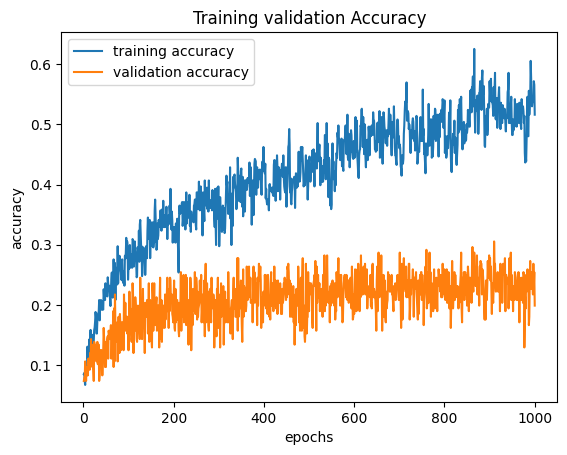

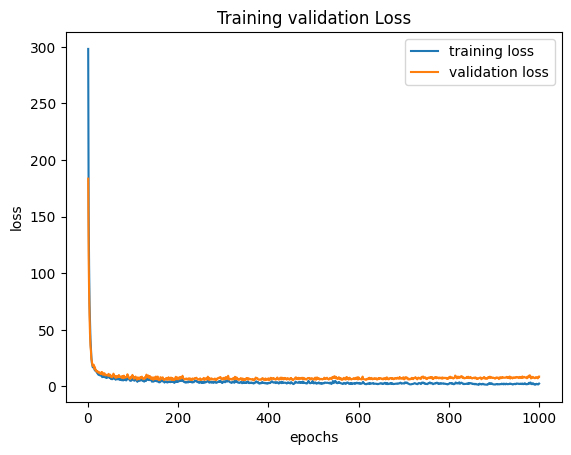

In [5]:
encoder_features_df = pd.read_csv(os.path.join('..', 'Dataset', 'artefact1', 'csv', 'encoder_process_images_and_save_features.csv'))

X, y = encoder_features_df.drop(columns=['label']), encoder_features_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define classification model
input_layer = Input(shape=(X.shape[1],))
hidden_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(len(np.unique(y)), activation='softmax')(hidden_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()
model.compile(optimizer=Adam(lr=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=1000, 
                    batch_size=64, 
                    validation_data=(X_test, y_test))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()


In [6]:
# Save model
model_folder_path = os.path.join('..', 'Dataset', 'artefact1', 'model')
os.makedirs(model_folder_path, exist_ok=True) 
model.save(os.path.join(model_folder_path, 'vanilla_autoencoder_model.h5'))

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# CR

In [31]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 2ms/step


In [32]:
# for ind in range(len(y_pred)): 
# #     print(y_pred[ind])
#     print(np.argmax(y_pred[ind]), round(y_pred[ind][np.argmax(y_pred[ind])]*100, 2))

In [33]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {accuracy:.2f}')

Test Accuracy: 0.20


In [34]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred_classes) # , target_names=class_names

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.15      0.17      0.16        12
           1       0.78      0.58      0.67        12
           2       0.42      0.42      0.42        12
           3       0.10      0.08      0.09        12
           4       0.11      0.08      0.10        12
           5       0.33      0.17      0.22        12
           6       0.25      0.17      0.20        12
           7       0.00      0.00      0.00        12
           8       0.20      0.08      0.12        12
           9       0.00      0.00      0.00        12
          10       0.10      0.33      0.16        12
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        12
          13       1.00      0.25      0.40        12
          14       0.10      0.25      0.14        12
          15       0.15      0.50      0.23        12
          16       0.44      0.33      0.38        12
          17       0.12    

C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProjectWork\Basic_Python\Zero_shot_Learning\venv_zsl\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

# Variational Autoencoder (VAE)

- Description: VAEs are generative models that assume the latent space follows a specific distribution, typically a Gaussian. The encoder maps the input to a distribution, and the decoder samples from this distribution to reconstruct the data. This allows for the generation of new data.
- Use Cases: Data generation, anomaly detection.

# Conditional Autoencoder

A conditional autoencoder is a type of neural network designed for unsupervised learning that generates outputs conditioned on specific inputs or labels. Unlike standard autoencoders, which aim to reconstruct the input data, conditional autoencoders use additional information to influence the encoding and decoding process. This makes them suitable for tasks where the output needs to be controlled or conditioned by some auxiliary information.

### Structure of a Conditional Autoencoder

1. Encoder: This part of the network takes the input data and the conditional information (e.g., labels or other contextual data) and encodes them into a latent representation. The encoder can be a series of fully connected layers, convolutional layers, or any other suitable architecture.

2. Latent Space: The encoded information, combined with the conditional input, resides in the latent space. This space captures the compressed representation of the input data.

3. Decoder: The decoder takes the latent representation and the conditional information to reconstruct the original input or generate new data that adheres to the condition.

### Applications

Conditional autoencoders are useful in various applications, including:

- Image generation: Creating images conditioned on certain attributes (e.g., generating images of a specific category or with certain features).

- Data imputation: Filling in missing values conditioned on observed data.

- Style transfer: Applying a specific style to images or other types of data.